In [ ]:
# prompt: armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Arte", "Música",
    "Educación Cívica", "Informática", "Filosofía", "Sociología"
]

# Generar datos aleatorios para el DataFrame
num_filas = 100
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Gómez", "Sánchez", "Ramírez"]
nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Carlos", "Sofía", "Diego", "Valentina"]

data = []
for _ in range(num_filas):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = np.random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = np.random.randint(1, 11)
  nota2 = np.random.randint(1, 11)
  nota3 = np.random.randint(1, 11)
  faltas = np.random.randint(0, 20)
  data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Fernández,Carlos,83325939,Química,3,1,6,0
1,Fernández,Sofía,62065273,Música,5,8,4,18
2,López,Pedro,11159165,Arte,6,5,2,8
3,López,Juan,72071937,Informática,3,4,9,10
4,García,Valentina,72064652,Educación Cívica,7,8,7,4
...,...,...,...,...,...,...,...,...
95,García,Valentina,28811541,Sociología,4,10,10,6
96,García,Luis,87181942,Educación Cívica,7,5,6,11
97,Ramírez,Valentina,14568461,Educación Cívica,10,8,9,9
98,Martínez,Ana,12417382,Química,6,8,4,15


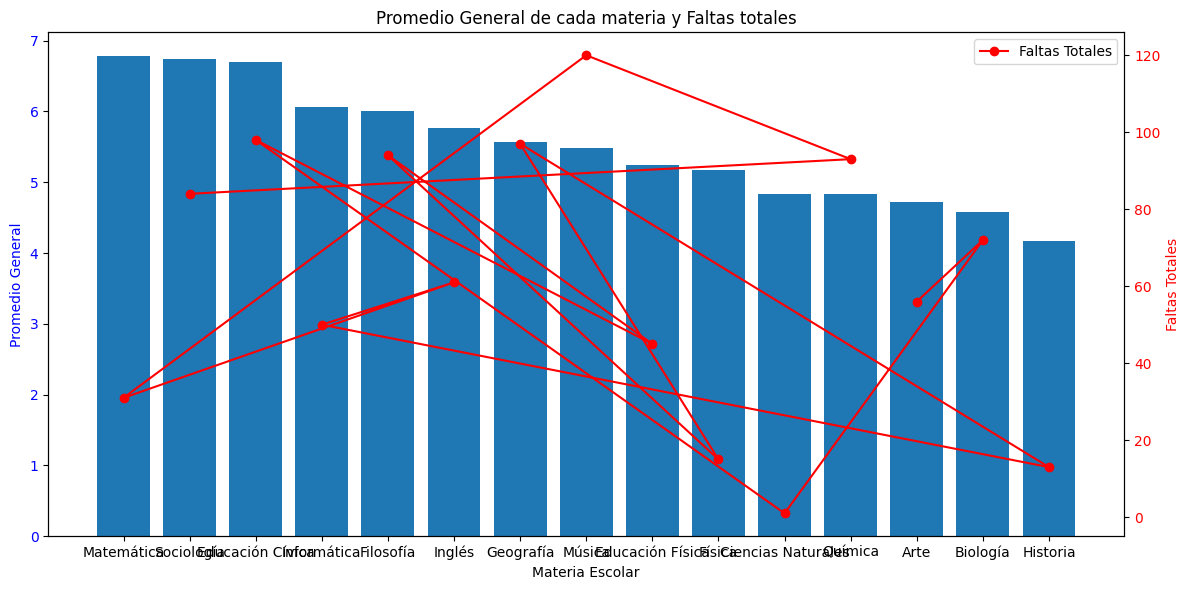

In [ ]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedio_materias_ordenado = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(promedio_materias_ordenado.index, promedio_materias_ordenado.values)
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Promedio General de cada materia y Faltas totales')

ax2 = ax1.twinx()  # Crear un segundo eje y
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la leyenda
plt.legend(['Faltas Totales', 'Promedio General'], loc='upper right')

plt.tight_layout()
plt.show()